In [170]:
import pandas as pd
import numpy as np
import sqlite3
import ast, json
from sqlite3 import Error
from IPython.display import Image

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

import warnings
warnings.simplefilter("ignore")

In [176]:
#Load Data 
harambee = pd.read_csv('teaching_training_data.csv')
harambee.head()

,Unnamed: 0,unid,survey_date_month,survey_num,gender,dob,province,working,job_start_date,job_leave_date,...,leadershiprole,peoplelive,peoplelive_15plus,numchildren,numearnincome,anygrant,anyhhincome,financial_situation_now,financial_situation_5years,givemoney_yes
0,1,41964,2018-06-01,1,Female,1992-02-01,NaN,True,2018-06-01,NaN,...,NaN,NaN,NaN,NaN,NaN,False,False,NaN,NaN,NaN
1,2,41964,2018-11-01,2,Female,1992-02-01,NaN,True,2018-04-30,2018-11-08,...,NaN,NaN,NaN,NaN,NaN,False,False,NaN,NaN,NaN
2,3,15241,2016-03-01,1,Female,1988-11-01,NaN,True,2015-03-01,2016-03-15,...,No,2,NaN,3,1,True,True,2,8,False
3,4,33702,2016-04-01,1,Male,1991-04-01,NaN,True,2016-02-01,2016-04-14,...,No,4,NaN,1,1,False,True,1 (Worst possible financial situation),1 (Worst possible financial situation),False
4,5,33702,2016-08-01,2,Male,1991-04-01,NaN,False,NaN,NaN,...,No,4,NaN,1,1,False,True,1 (Worst possible financial situation),1 (Worst possible financial situation),False


In [ ]:
#Exploring Data 

In [10]:
harambee.groupby(['leadershiprole','working']).count()

Unnamed: 0   unid  survey_date_month  survey_num  \
leadershiprole working                                                     
No             False         23629  23629              23629       23629   
               True           8166   8166               8166        8166   
Yes            False         14170  14170              14170       14170   
               True           5384   5384               5384        5384   

                        gender    dob  province  job_start_date  \
leadershiprole working                                            
No             False     23629  23625     12495            2365   
               True       8166   8166      4547            6775   
Yes            False     14170  14170      7506            1634   
               True       5384   5383      3005            4465   

                        job_leave_date  company_size  ...  volunteer  \
leadershiprole working                                ...              
No             False              2175             0  ...      23629   
               True               6775             0  ...       8166   
Yes            False              1528             0  ...      14170   
               True               4462             0  ...       5384   

                        peoplelive  peoplelive_15plus  numchildren  \
leadershiprole working                                               
No             False         23604               7762        23547   
               True           8155               2207         8136   
Yes            False         14146               4798        14116   
               True           5380               1599         5355   

                        numearnincome  anygrant  anyhhincome  \
leadershiprole working                                         
No             False            15083     23629        23629   
               True              5682      8166         8166   
Yes            False             8944     14170        14170   
               True              3613      5384         5384   

                        financial_situation_now  financial_situation_5years  \
leadershiprole working                                                        
No             False                      22953                       22953   
               True                        7880                        7880   
Yes            False                      13760                       13760   
               True                        5223                        5223   

                        givemoney_yes  
leadershiprole working                 
No             False            23199  
               True              8000  
Yes            False            13878  
               True              5263  

[4 rows x 21 columns]

In [20]:
harambee.groupby(['province','working'], dropna = False).count()


Unnamed: 0   unid  survey_date_month  survey_num  \
province      working                                                     
Eastern Cape  False          2263   2263               2263        2263   
              True            693    693                693         693   
Free state    False           292    292                292         292   
              True            122    122                122         122   
Gauteng       False         15668  15668              15668       15668   
              True           5737   5737               5737        5737   
KwaZulu-Natal False          3906   3906               3906        3906   
              True           1329   1329               1329        1329   
Limpopo       False           829    829                829         829   
              True            321    321                321         321   
Mpumalanga    False           783    783                783         783   
              True            256    256                256         256   
North West    False           421    421                421         421   
              True            209    209                209         209   
Northern Cape False            78     78                 78          78   
              True             26     26                 26          26   
Western Cape  False          1232   1232               1232        1232   
              True            709    709                709         709   
NaN           False         37937  37937              37937       37937   
              True          10459  10459              10459       10459   

                       gender    dob  job_start_date  job_leave_date  \
province      working                                                  
Eastern Cape  False      2263   2262             210             184   
              True        693    693             528             528   
Free state    False       292    292              30              29   
              True        122    122             100             100   
Gauteng       False     15668  15661            1654            1500   
              True       5737   5737            4587            4585   
KwaZulu-Natal False      3906   3906             403             354   
              True       1329   1328            1015            1015   
Limpopo       False       829    829              88              79   
              True        321    321             247             246   
Mpumalanga    False       783    783              77              68   
              True        256    256             210             210   
North West    False       421    421              71              66   
              True        209    209             155             155   
Northern Cape False        78     78               4               3   
              True         26     26              19              19   
Western Cape  False      1232   1232             159             139   
              True        709    709             519             519   
NaN           False     37916  37808            7451            2079   
              True      10456  10431            8528            6832   

                       company_size  monthly_pay  ...  leadershiprole  \
province      working                             ...                   
Eastern Cape  False               0            0  ...             842   
              True                0            0  ...             278   
Free state    False               0            0  ...             196   
              True                0            0  ...              97   
Gauteng       False               0            0  ...           13323   
              True                0            0  ...            4929   
KwaZulu-Natal False               0            0  ...            3085   
              True                0            0  ...            1049   
Limpopo       False               0            0  ...    

In [ ]:
 #Group Data following the requirement 

In [11]:
df = harambee.groupby(['province','working'], dropna = False).count()/ harambee.count()
d

Unnamed: 0  anygrant  anyhhincome  company_size  \
province      working                                                    
Eastern Cape  False      0.027177  0.013201     0.013201      0.000000   
              True       0.008322  0.004378     0.004378      0.000000   
Free state    False      0.003507  0.002923     0.002923      0.000000   
              True       0.001465  0.001362     0.001362      0.000000   
Gauteng       False      0.188159  0.189296     0.189296      0.000000   
              True       0.068896  0.069920     0.069920      0.000000   
KwaZulu-Natal False      0.046908  0.044219     0.044219      0.000000   
              True       0.015960  0.015092     0.015092      0.000000   
Limpopo       False      0.009956  0.009405     0.009405      0.000000   
              True       0.003855  0.003505     0.003505      0.000000   
Mpumalanga    False      0.009403  0.007619     0.007619      0.000000   
              True       0.003074  0.002526     0.002526      0.000000   
North West    False      0.005056  0.004365     0.004365      0.000000   
              True       0.002510  0.002222     0.002222      0.000000   
Northern Cape False      0.000937  0.000635     0.000635      0.000000   
              True       0.000312  0.000212     0.000212      0.000000   
Western Cape  False      0.014795  0.015079     0.015079      0.000000   
              True       0.008514  0.008651     0.008651      0.000000   
NaN           False      0.455590  0.476502     0.476502      0.750498   
              True       0.125603  0.128887     0.128887      0.249502   

                            dob  financial_situation_5years  \
province      working                                         
Eastern Cape  False    0.027219                    0.016561   
              True     0.008339                    0.005540   
Free state    False    0.003514                    0.003874   
              True     0.001468                    0.001907   
Gauteng       False    0.188451                    0.264674   
              True     0.069034                    0.097880   
KwaZulu-Natal False    0.047001                    0.061245   
              True     0.015980                    0.020897   
Limpopo       False    0.009975                    0.012647   
              True     0.003863                    0.004577   
Mpumalanga    False    0.009422                    0.010258   
              True     0.003080                    0.003413   
North West    False    0.005066                    0.005962   
              True     0.002515                    0.003111   
Northern Cape False    0.000939                    0.000823   
              True     0.000313                    0.000321   
Western Cape  False    0.014825                    0.020937   
              True     0.008531                    0.012446   
NaN           False    0.454948                    0.339991   
              True     0.125517                    0.112936   

                       financial_situation_now    gender  givemoney_yes  \
province      working                                                     
Eastern Cape  False                   0.016561  0.027184       0.016341   
              True                    0.005540  0.008325       0.005275   
Free state    False                   0.003874  0.003508       0.003827   
              True                    0.001907  0.001466       0.001884   
Gauteng       False                   0.264674  0.188213       0.255211   
              True                    0.097880  0.068916       0.094794   
KwaZulu-Natal False                   0.061245  0.046921       0.059395   
              True                    0.020897  0.015965       0.019911   
Limpopo       False                   0.012647  0.009958       0.012454   
              True                    0.004577  0.003856       0.004422   
Mpumalanga    False                   0.010258  0.009406       0.009876   
              True              

In [ ]:
#Exploring Data 

In [60]:
df.shape

(20, 23)

In [65]:
df.size

460

In [75]:
df.dtypes

Unnamed: 0                    float64
anygrant                      float64
anyhhincome                   float64
company_size                  float64
dob                           float64
financial_situation_5years    float64
financial_situation_now       float64
gender                        float64
givemoney_yes                 float64
job_leave_date                float64
job_start_date                float64
leadershiprole                float64
monthly_pay                   float64
numchildren                   float64
numearnincome                 float64
peoplelive                    float64
peoplelive_15plus             float64
province                      float64
survey_date_month             float64
survey_num                    float64
unid                          float64
volunteer                     float64
working                       float64
dtype: object

In [74]:
df.apply('nunique')

Unnamed: 0                    20
anygrant                      20
anyhhincome                   20
company_size                   3
dob                           20
financial_situation_5years    20
financial_situation_now       20
gender                        20
givemoney_yes                 20
job_leave_date                20
job_start_date                19
leadershiprole                20
monthly_pay                    3
numchildren                   19
numearnincome                 19
peoplelive                    20
peoplelive_15plus             20
province                       0
survey_date_month             20
survey_num                    20
unid                          20
volunteer                     20
working                        0
dtype: int64

In [63]:
#df.columns
for col in df.columns:
    print(col)

Unnamed: 0
anygrant
anyhhincome
company_size
dob
financial_situation_5years
financial_situation_now
gender
givemoney_yes
job_leave_date
job_start_date
leadershiprole
monthly_pay
numchildren
numearnincome
peoplelive
peoplelive_15plus
province
survey_date_month
survey_num
unid
volunteer
working


In [66]:
a = df['gender'].unique()
a

array([2.71844893e-02, 8.32472431e-03, 3.50767604e-03, 1.46553588e-03,
       1.88213247e-01, 6.89162242e-02, 4.69211734e-02, 1.59647310e-02,
       9.95843644e-03, 3.85604113e-03, 9.40585734e-03, 3.07522283e-03,
       5.05730005e-03, 2.51063114e-03, 9.36981957e-04, 3.12327319e-04,
       1.47995099e-02, 8.51692574e-03, 4.55469332e-01, 1.25603633e-01])

In [119]:
#Missing Values 
xXXXXXXXXXXXX3

Unnamed: 0                    0
financial_situation_5years    0
gender                        0
monthly_pay                   0
numchildren                   0
numearnincome                 0
province                      0
volunteer                     0
working                       0
dtype: int64


In [122]:
#Replace missing values by "0"
df["working"] = df.working.fillna(0)


In [123]:
df["province"] = df.province.fillna(0)

In [124]:
df.head()

Unnamed: 0  financial_situation_5years    gender  \
province     working                                                     
Eastern Cape False      0.027177                    0.016561  0.027184   
             True       0.008322                    0.005540  0.008325   
Free state   False      0.003507                    0.003874  0.003508   
             True       0.001465                    0.001907  0.001466   
Gauteng      False      0.188159                    0.264674  0.188213   

                      monthly_pay  numchildren  numearnincome  province  \
province     working                                                      
Eastern Cape False            0.0     0.016343       0.011951       0.0   
             True             0.0     0.005435       0.004702       0.0   
Free state   False            0.0     0.003832       0.002696       0.0   
             True             0.0     0.001877       0.001827       0.0   
Gauteng      False            0.0     0.259608       0.146614       0.0   

                      volunteer  working  
province     working                      
Eastern Cape False     0.016398  missing  
             True      0.005414  missing  
Free state   False     0.003817  missing  
             True      0.001889  missing  
Gauteng      False     0.259460  missing

<AxesSubplot:ylabel='financial_situation_5years'>

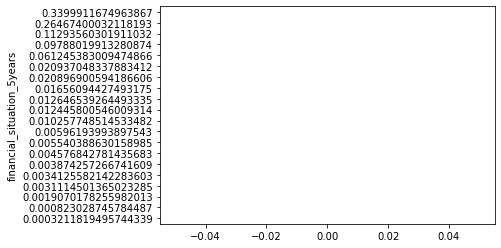

In [129]:
df.groupby("financial_situation_5years")["province"].mean().plot.barh() 

In [112]:
def pivot_count(df, rows, columns): # this just makes a function that does a pivotcount for us with different variables.
    df_pivot = df.pivot_table(values="id", # could be any column, since we are just counting rows 
                              index=rows, 
                              columns=columns, 
                              aggfunc=np.size
                             ).dropna(axis=0, how='all')
    return df_pivot


In [ ]:
#Plot Data 

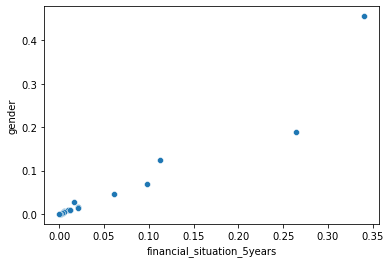

In [68]:
ax = sns.scatterplot(x="financial_situation_5years", y="gender", data=df)

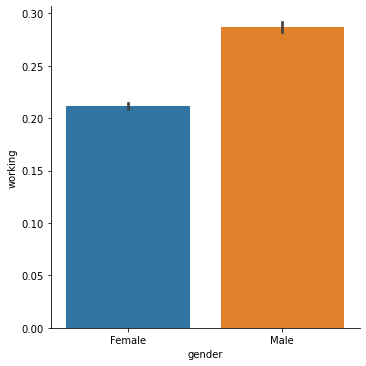

In [72]:
sns.catplot(x="gender", y="working", data=harambee, kind="bar")

In [ ]:
sns.catplot(x="fina", y="working", data=harambee, kind="bar")

In [24]:
#Hypothesis Test : T-Test

harambee.columns

Index(['Unnamed: 0', 'unid', 'survey_date_month', 'survey_num', 'gender',
       'dob', 'province', 'working', 'job_start_date', 'job_leave_date',
       'company_size', 'monthly_pay', 'volunteer', 'leadershiprole',
       'peoplelive', 'peoplelive_15plus', 'numchildren', 'numearnincome',
       'anygrant', 'anyhhincome', 'financial_situation_now',
       'financial_situation_5years', 'givemoney_yes'],
      dtype='object')

In [26]:
news_users = harambee[harambee.working.notnull()]
news_users
news_usage_men = news_users[(news_users.gender=="Male")].working
news_usage_women = news_users[(news_users.gender=="Female")].working


In [27]:
news_usage_women.describe()

count     53453
unique        2
top       False
freq      42144
Name: working, dtype: object

In [28]:
news_usage_men.describe()

count     29793
unique        2
top       False
freq      21244
Name: working, dtype: object

In [29]:
from statsmodels.stats.weightstats import ttest_ind
from scipy import stats

In [30]:
tstat, pvalue, ddof = ttest_ind(
                                news_usage_men,
                                news_usage_women,
                                alternative="larger",
                                usevar="pooled"
)

In [31]:
print(ddof)

83244.0


In [32]:
len(news_usage_men) + len(news_usage_women) - 2

83244

In [33]:
print(tstat)

24.550309369196412


In [34]:
pvalue

6.378920772931187e-133

In [35]:
from scipy import stats
1 - stats.t.cdf(tstat, df=ddof)

0.0

In [50]:
#Hypothesis Test: ANOVA
from scipy.stats import f_oneway

harambee.working.value_counts()

Gauteng          21405
KwaZulu-Natal     5235
Eastern Cape      2956
Western Cape      1941
Limpopo           1150
Mpumalanga        1039
North West         630
Free state         414
Northern Cape      104
Name: province, dtype: int64

In [38]:
working_gender = harambee[["gender", "working"]][~harambee.working.isin(["Men","Women","Don't Know"])]
working_gender

,gender,working
0,Female,True
1,Female,True
2,Female,True
3,Male,True
4,Male,False
...,...,...
83265,Male,False
83266,Male,False
83267,Female,False
83268,Female,True


In [41]:
gender_by_zone = []
for zone in working_gender.working.unique():
    gender_by_zone.append({"name": zone,
                        "gender": working_gender[working_gender.working==zone].gender.values})

In [42]:
gender_by_zone

[{'name': True,
  'gender': array(['Female', 'Female', 'Female', ..., 'Female', 'Female', 'Female'],
        dtype=object)},
 {'name': False,
  'gender': array(['Male', 'Male', 'Male', ..., 'Male', 'Male', 'Female'],
        dtype=object)}]

In [53]:
#Province
harambee.province.value_counts()


Gauteng          21405
KwaZulu-Natal     5235
Eastern Cape      2956
Western Cape      1941
Limpopo           1150
Mpumalanga        1039
North West         630
Free state         414
Northern Cape      104
Name: province, dtype: int64

In [54]:
working_province = harambee[["province", "working"]][~harambee.province.isin(["Don't Know","Know"])]

In [55]:
province_by_zone = []
for zone in working_province.province.unique():
    province_by_zone.append({"name": zone,
                        "province": working_province[working_province.province==zone].working.values})

In [56]:
province_by_zone

[{'name': nan, 'province': array([], dtype=bool)},
 {'name': 'Gauteng',
  'province': array([ True, False, False, ..., False,  True,  True])},
 {'name': 'Western Cape',
  'province': array([False, False,  True, ..., False, False, False])},
 {'name': 'Limpopo',
  'province': array([False, False, False, ..., False, False,  True])},
 {'name': 'KwaZulu-Natal',
  'province': array([False, False,  True, ..., False, False, False])},
 {'name': 'Eastern Cape',
  'province': array([False, False, False, ...,  True,  True, False])},
 {'name': 'Mpumalanga',
  'province': array([False, False, False, ..., False, False, False])},
 {'name': 'Free state',
  'province': array([ True,  True,  True, False, False, False, False, False, False,
         False, False, False, False, False, False, False,  True, False,
          True,  True,  True,  True,  True, False,  True, False,  True,
         False, False, False, False, False, False, False, False, False,
          True, False, False,  True, False, False, Fal

In [58]:
f_oneway(*[zone["province"] for zone in province_by_zone])

F_onewayResult(statistic=nan, pvalue=nan)

In [177]:
harambee.dtypes

Unnamed: 0                     int64
unid                           int64
survey_date_month             object
survey_num                     int64
gender                        object
dob                           object
province                      object
working                         bool
job_start_date                object
job_leave_date                object
company_size                  object
monthly_pay                   object
volunteer                     object
leadershiprole                object
peoplelive                    object
peoplelive_15plus             object
numchildren                   object
numearnincome                 object
anygrant                      object
anyhhincome                   object
financial_situation_now       object
financial_situation_5years    object
givemoney_yes                 object
dtype: object

In [178]:

harambee.financial_situation_now.value_counts()

1 (Worst possible financial situation)    17901
2                                         11070
3                                          9030
4                                          5966
5                                          3613
6                                           854
10 (Best possible financial situation)      620
7                                           419
8                                           199
9                                           144
Name: financial_situation_now, dtype: int64

In [194]:
harambee['financial_situation_now'] = harambee['financial_situation_now'].replace(to_replace='1 (Worst possible financial situation)', value=1, regex=False)

In [180]:
harambee.groupby(['financial_situation_5years', 'financial_situation_now']).count()

Unnamed: 0  \
financial_situation_5years             financial_situation_now                              
1 (Worst possible financial situation) 1 (Worst possible financial situation)         249   
                                       10 (Best possible financial situation)          35   
                                       2                                               73   
                                       3                                               47   
                                       4                                               23   
...                                                                                   ...   
9                                      5                                              805   
                                       6                                              233   
                                       7                                               70   
                                       8                                               18   
                                       9                                               31   

                                                                               unid  \
financial_situation_5years             financial_situation_now                        
1 (Worst possible financial situation) 1 (Worst possible financial situation)   249   
                                       10 (Best possible financial situation)    35   
                                       2                                         73   
                                       3                                         47   
                                       4                                         23   
...                                                                             ...   
9                                      5                                        805   
                                       6                                        233   
                                       7                                         70   
                                       8                                         18   
                                       9                                         31   

                                                                               survey_date_month  \
financial_situation_5years             financial_situation_now                                     
1 (Worst possible financial situation) 1 (Worst possible financial situation)                249   
                                       10 (Best possible financial situation)                 35   
                                       2                                                      73   
                                       3                                                      47   
                                       4                                                      23   
...                                                                                          ...   
9                                      5                                                     805   
                                       6                                                     233   
                                       7                                                      70   
                                       8                                                      18   
                                       9                                                      31   

                                                                               survey_num  \
financial_situation_5years             financial_situation_now                              
1 (Worst possible financial situation) 1 (Worst possible financial situation)         249   
                                       10 (Best possible financial situation)          35   
                                       2                        

In [161]:
harambee['financial_situation_now'].unique()

array([nan,  2.,  1.,  3.,  4., 10.,  5.,  6.,  7.,  9.,  8.])

In [195]:
harambee['financial_situation_now'] = harambee['financial_situation_now'].replace(to_replace='10 (Best possible financial situation)', value=10, regex=False)

In [163]:
harambee['financial_situation_now'].unique()

array([nan,  2.,  1.,  3.,  4., 10.,  5.,  6.,  7.,  9.,  8.])

In [196]:
harambee['financial_situation_now'] = pd.to_numeric(harambee['financial_situation_now'])

In [202]:
pd.value_counts(harambee['financial_situation_now'], dropna = False)

NaN     33454
1.0     17901
2.0     11070
3.0      9030
4.0      5966
5.0      3613
6.0       854
10.0      620
7.0       419
8.0       199
9.0       144
Name: financial_situation_now, dtype: int64

In [156]:
values_counts?

Object `values_counts` not found.


In [197]:
harambee['financial_situation_5years'] = harambee['financial_situation_5years'].replace(to_replace='1 (Worst possible financial situation)', value=1, regex=False)

In [198]:
harambee['financial_situation_5years'] = harambee['financial_situation_5years'].replace(to_replace='10 (Best possible financial situation)', value=10, regex=False)

In [199]:
harambee['financial_situation_5years'] = pd.to_numeric(harambee['financial_situation_5years'])


In [201]:
pd.value_counts(harambee['financial_situation_5years'], dropna = False)

NaN     33454
10.0    16421
8.0      8453
7.0      6822
9.0      5944
6.0      5081
5.0      4259
4.0      1313
3.0       668
1.0       454
2.0       401
Name: financial_situation_5years, dtype: int64

In [203]:
harambee[['financial_situation_now', 'financial_situation_5years']]

,financial_situation_now,financial_situation_5years
0,NaN,NaN
1,NaN,NaN
2,2.0,8.0
3,1.0,1.0
4,1.0,1.0
...,...,...
83265,5.0,7.0
83266,1.0,5.0
83267,9.0,10.0
83268,9.0,10.0


<AxesSubplot:>

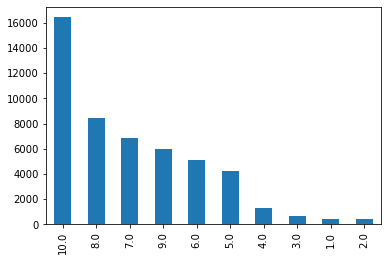

In [204]:
pd.value_counts(harambee['financial_situation_5years']).plot.bar()

In [205]:
harambee['financial_situation_change'] = harambee['financial_situation_5years'] - harambee['financial_situation_now']

In [206]:
harambee[['financial_situation_change', 'financial_situation_now', 'financial_situation_5years']]

,financial_situation_change,financial_situation_now,financial_situation_5years
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,6.0,2.0,8.0
3,0.0,1.0,1.0
4,0.0,1.0,1.0
...,...,...,...
83265,2.0,5.0,7.0
83266,4.0,1.0,5.0
83267,1.0,9.0,10.0
83268,1.0,9.0,10.0


<AxesSubplot:>

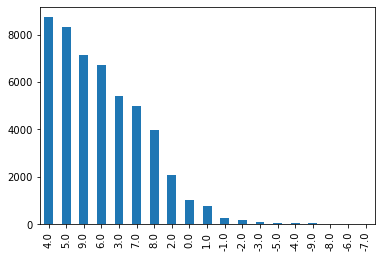

In [207]:
pd.value_counts(harambee['financial_situation_change']).plot.bar()

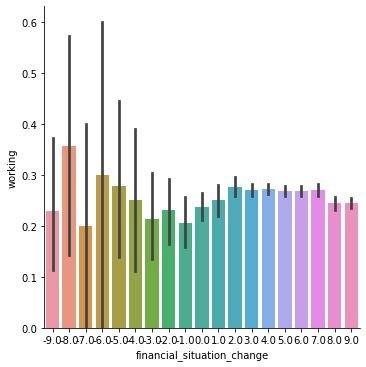

In [208]:
sns.catplot(x="financial_situation_change", y="working", data=harambee, kind="bar")

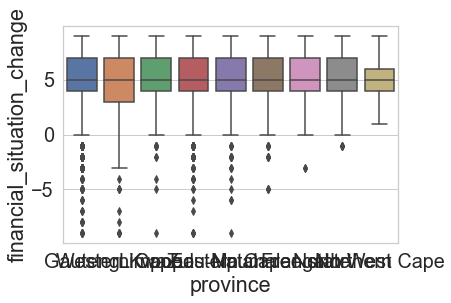

In [258]:
ax = sns.boxplot(x="provincc", y="financial_situation_change", data=harambee)

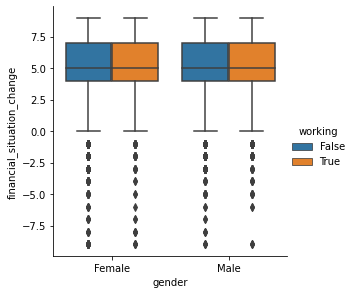

In [214]:
g = sns.catplot(x="gender", y="financial_situation_change",
                hue="working", 
                data=harambee, kind="box",
                height=4, aspect=1.0);

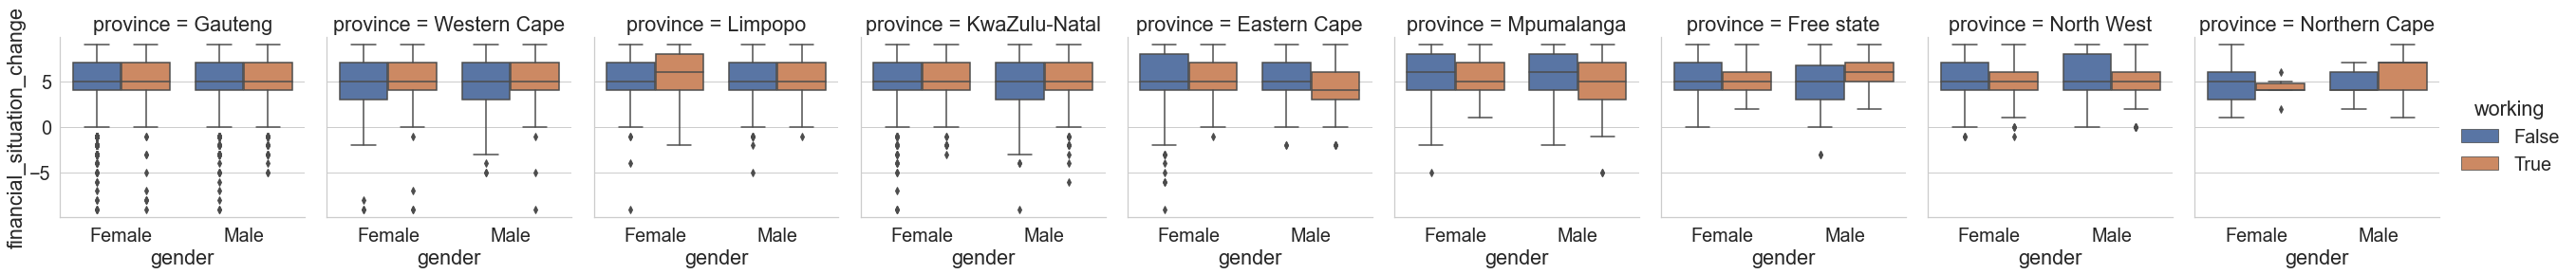

In [244]:
sns.set(font_scale = 1.8)
sns.set_style("whitegrid")
p = sns.catplot(x="gender", y="financial_situation_change",
                hue="working", col = "province",
                data=harambee, kind="box",
                height= 4, aspect=1.0);


In [224]:
pd.value_counts(harambee['financial_situation_change'], dropna = False)

 NaN    33454
 4.0     8735
 5.0     8325
 9.0     7139
 6.0     6711
 3.0     5427
 7.0     4984
 8.0     3963
 2.0     2086
 0.0     1014
 1.0      780
-1.0      257
-2.0      165
-3.0       89
-5.0       36
-4.0       36
-9.0       35
-8.0       14
-7.0       10
-6.0       10
Name: financial_situation_change, dtype: int64

In [226]:
#names = df.columns.drop('province')
#ncols = len(names)
#fig, axes = plt.subplots(1,ncols)

#for financial_situation_change, ax in zip(names, axes.flatten()):
#    sns.boxplot(y=financial_situation_change, x= "gender", data=harambee, orient='v', ax=ax)
    
#plt.tight_layout()

In [245]:
#Hypothesis Test: ANOVA
from scipy.stats import f_oneway

harambee.working.value_counts()

False    63409
True     19861
Name: working, dtype: int64

In [254]:
workingz = harambee[["financial_situation_change", "gender", "province", "working"]][~harambee.working.isin(["Work","Don't Know"])]
workingz

,financial_situation_change,gender,province,working
0,NaN,Female,NaN,True
1,NaN,Female,NaN,True
2,6.0,Female,NaN,True
3,0.0,Male,NaN,True
4,0.0,Male,NaN,False
...,...,...,...,...
83265,2.0,Male,KwaZulu-Natal,False
83266,4.0,Male,Gauteng,False
83267,1.0,Female,NaN,False
83268,1.0,Female,Gauteng,True


In [255]:
work_by_zone = []
for zone in workingz.working.unique():
    work_by_zone.append({"name": zone,
                        "work": workingz[workingz.working==zone].working.values})

In [256]:
financial_by_zone

[{'name': True, 'financial': array([nan, nan,  6., ...,  9.,  1.,  1.])},
 {'name': False, 'financial': array([ 0.,  0., nan, ...,  2.,  4.,  1.])}]

In [257]:
f_oneway(*[zone["financial"] for zone in financial_by_zone])

F_onewayResult(statistic=nan, pvalue=nan)